   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
=== IRIS Dataset Results ===
Accuracy: 0.9666666666666667

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



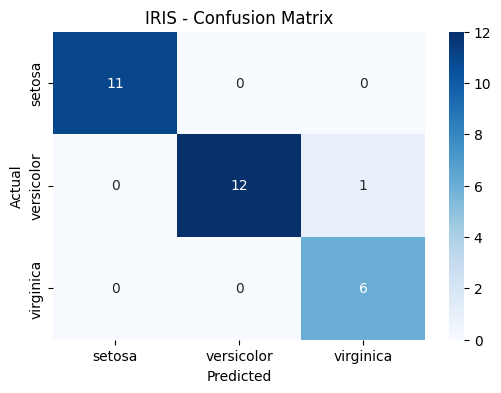

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.read_csv('/content/iris (2).csv')

print(iris_df.head())

X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("=== IRIS Dataset Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("IRIS - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



=== Diabetes Dataset Results ===
Accuracy: 0.8051948051948052

Confusion Matrix:
 [[94 13]
 [17 30]]


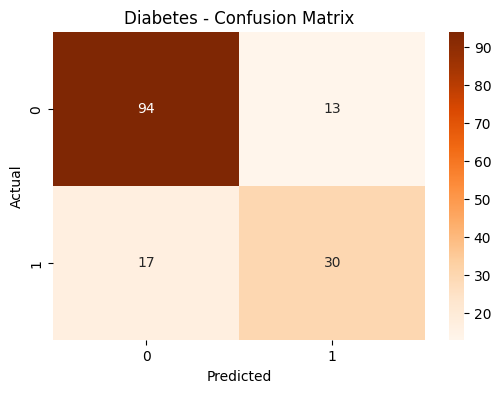

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('/content/diabetes.csv')

X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("\n=== Diabetes Dataset Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Oranges", fmt='d')
plt.title("Diabetes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


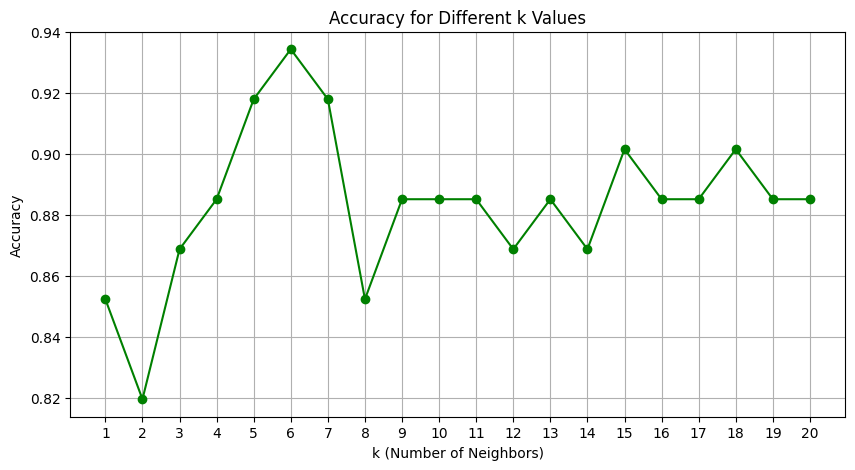

Best k: 6 with accuracy: 0.9344


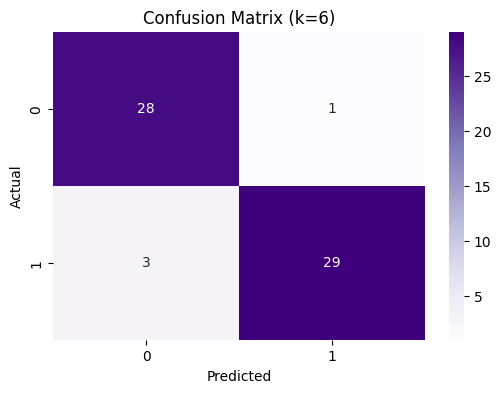

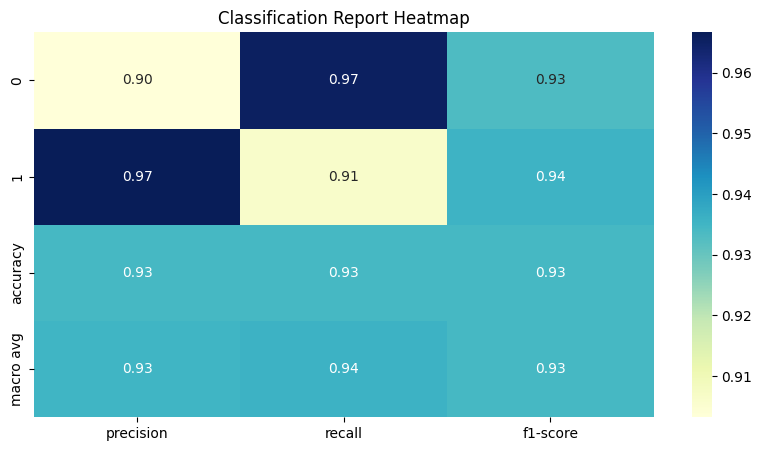


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

df = pd.read_csv('/content/heart.csv')

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(k_range, scores, marker='o', color='green')
plt.title('Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(scores)]
print(f"Best k: {best_k} with accuracy: {max(scores):.4f}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)

plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title(f"Confusion Matrix (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report = classification_report(y_test, y_final_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_final_pred))
